In [56]:
# try to use one from these 2 algos
# Edge detection + contour detection: Edge detection is a fundamental image processing technique that involves 
# detecting edges in an image. Once the edges are detected, you can use contour detection to identify the boundaries 
# of the digits in the image. This approach can be implemented using OpenCV, a popular computer vision library.

# Connected component analysis: Connected component analysis is a basic image processing technique that involves 
# grouping pixels into connected regions based on their intensity values. In the case of the SVHN dataset, you can 
# use connected component analysis to identify the individual digits in the image. This approach can also be 
# implemented using OpenCV.

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import random

In [58]:
# Load test image
#image = cv2.imread('data/train/' + str(random.randint(1,33402))+ '.png')
image = cv2.imread('data/train/5485.png')
image_copy = copy.copy(image)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to separate digits from background
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set digit size range for filtering contours
MIN_DIGIT_SIZE = 10
MAX_DIGIT_SIZE = 100

# Loop over contours and filter out non-digit contours
digit_contours = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if w * h > MIN_DIGIT_SIZE and w * h < MAX_DIGIT_SIZE:
        digit_contours.append(contour)
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

"""
# Loop over remaining digit contours and extract ROIs
for contour in digit_contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    roi = thresh[y:y + h, x:x + w]
    
    # Resize ROI to fixed size
    roi = cv2.resize(roi, (28, 28))
    
    # Apply any necessary preprocessing to ROI
    
    # Pass ROI to digit recognition model to predict digit label
    #digit_label = predict_digit_label(roi)
    
    # Draw predicted digit label on original image
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.putText(image, str(digit_label), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
# Show image with digit labels
cv2.imshow('Digits', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

"\n# Loop over remaining digit contours and extract ROIs\nfor contour in digit_contours:\n    (x, y, w, h) = cv2.boundingRect(contour)\n    roi = thresh[y:y + h, x:x + w]\n    \n    # Resize ROI to fixed size\n    roi = cv2.resize(roi, (28, 28))\n    \n    # Apply any necessary preprocessing to ROI\n    \n    # Pass ROI to digit recognition model to predict digit label\n    #digit_label = predict_digit_label(roi)\n    \n    # Draw predicted digit label on original image\n    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)\n    #cv2.putText(image, str(digit_label), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)\n# Show image with digit labels\ncv2.imshow('Digits', image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

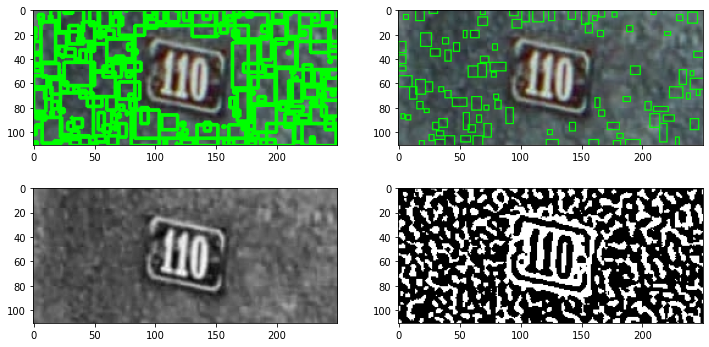

In [59]:
f, axarr = plt.subplots(2,2, figsize=(12, 6))
axarr[0,0].imshow(image)
axarr[0,1].imshow(image_copy)
axarr[1,0].imshow(gray, cmap='gray')
axarr[1,1].imshow(thresh, cmap='gray')

# Drawing Contours
Read the Image and convert it to Grayscale Format
Apply Binary Thresholding
Find the Contours
Draw Contours on the Original RGB Image.